In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib


In [6]:
import os
os.listdir("dataset")


['Complete_Dataframe_def.xlsx',
 'Exact_enumeration_task.xlsx',
 'Symbolic_comparison_task.xlsx',
 'Visuo_spatial_WM_task.xlsx']

In [8]:
df1 = pd.read_excel("dataset/Complete_Dataframe_def.xlsx")
df2 = pd.read_excel("dataset/Exact_enumeration_task.xlsx")
df3 = pd.read_excel("dataset/Symbolic_comparison_task.xlsx")
df4 = pd.read_excel("dataset/Visuo_spatial_WM_task.xlsx")

In [10]:
print("DF1 columns:\n", df1.columns)
print("\nDF2 columns:\n", df2.columns)
print("\nDF3 columns:\n", df3.columns)
print("\nDF4 columns:\n", df4.columns)


DF1 columns:
 Index(['Sub', 'Similarities_IQ', 'MatrixReas_IQ', 'w_fraction_def',
       'Mean_ACC_ANS', 'Mean_RTs_ANS', 'Mean_RTs_def', 'Mean_ACC_13',
       'Mean_ACC_47', 'MeanRT_13', 'MeanRT_47', 'EfficiencyScore_13',
       'EfficiencyScore_47', 'CoV_13', 'CoV_47', 'wm_K', 'Avanti', 'Indietro',
       'Average_Corsi', 'Accuracy_SymbolicComp', 'RTs_SymbolicComp', 'group'],
      dtype='object')

DF2 columns:
 Index(['Sub', 'Numerosity', 'RTs', 'Accuracy', 'Group'], dtype='object')

DF3 columns:
 Index(['Sub', 'Distance', 'RTs', 'Accuracy', 'Group'], dtype='object')

DF4 columns:
 Index(['Sub', 'Numerosity', 'RTs_WM', 'Accuracy_WM', 'Group'], dtype='object')


In [11]:
df = df1.merge(df2, on="Sub", how="inner", suffixes=("", "_df2"))
df = df.merge(df3, on="Sub", how="inner", suffixes=("", "_df3"))
df = df.merge(df4, on="Sub", how="inner", suffixes=("", "_df4"))

print(df.shape)
df.head()


(32768, 34)


,Sub,Similarities_IQ,MatrixReas_IQ,w_fraction_def,Mean_ACC_ANS,Mean_RTs_ANS,Mean_RTs_def,Mean_ACC_13,Mean_ACC_47,MeanRT_13,...,Accuracy,Group,Distance,RTs_df3,Accuracy_df3,Group_df3,Numerosity_df4,RTs_WM,Accuracy_WM,Group_df4
0,1,16.0,11.0,0.418544,61.71875,1266.90625,1266.90625,0.791667,0.265625,0.719789,...,0.875,DD,1,2297.42,0.75,DD,1,3399.19,0.63,DD
1,1,16.0,11.0,0.418544,61.71875,1266.90625,1266.90625,0.791667,0.265625,0.719789,...,0.875,DD,1,2297.42,0.75,DD,2,2562.63,0.69,DD
2,1,16.0,11.0,0.418544,61.71875,1266.90625,1266.90625,0.791667,0.265625,0.719789,...,0.875,DD,1,2297.42,0.75,DD,3,1573.63,0.88,DD
3,1,16.0,11.0,0.418544,61.71875,1266.90625,1266.90625,0.791667,0.265625,0.719789,...,0.875,DD,1,2297.42,0.75,DD,4,2559.06,0.56,DD
4,1,16.0,11.0,0.418544,61.71875,1266.90625,1266.90625,0.791667,0.265625,0.719789,...,0.875,DD,1,2297.42,0.75,DD,5,1980.88,0.38,DD


In [12]:
cols_to_drop = [col for col in df.columns if col.lower() == "group" and col != "group"]
df = df.drop(columns=cols_to_drop)

print(df.columns)


Index(['Sub', 'Similarities_IQ', 'MatrixReas_IQ', 'w_fraction_def',
       'Mean_ACC_ANS', 'Mean_RTs_ANS', 'Mean_RTs_def', 'Mean_ACC_13',
       'Mean_ACC_47', 'MeanRT_13', 'MeanRT_47', 'EfficiencyScore_13',
       'EfficiencyScore_47', 'CoV_13', 'CoV_47', 'wm_K', 'Avanti', 'Indietro',
       'Average_Corsi', 'Accuracy_SymbolicComp', 'RTs_SymbolicComp', 'group',
       'Numerosity', 'RTs', 'Accuracy', 'Distance', 'RTs_df3', 'Accuracy_df3',
       'Group_df3', 'Numerosity_df4', 'RTs_WM', 'Accuracy_WM', 'Group_df4'],
      dtype='object')


In [14]:
y = df["group"]          # 1 = Dyscalculia, 0 = Control
X = df.drop(["group", "Sub"], axis=1)


In [15]:
X = X.apply(pd.to_numeric, errors="coerce")


In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)


c:\Users\work\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['Group_df3' 'Group_df4']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=400,
    max_depth=14,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)


,n_estimators,400
,criterion,'gini'
,max_depth,14
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          DD       1.00      1.00      1.00      3277
       contr       1.00      1.00      1.00      3277

    accuracy                           1.00      6554
   macro avg       1.00      1.00      1.00      6554
weighted avg       1.00      1.00      1.00      6554


Confusion Matrix:
 [[3277    0]
 [   0 3277]]


In [21]:
import os, joblib

os.makedirs("model", exist_ok=True)

joblib.dump(model, "model/trained_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")

print("✅ Model and scaler saved successfully")


✅ Model and scaler saved successfully


In [22]:
# Using one real sample structure
new_student = X_test[0].reshape(1, -1)

prediction = model.predict(new_student)

if prediction[0] == 1:
    print("⚠ Dyscalculia detected")
else:
    print("✅ No Dyscalculia detected")


✅ No Dyscalculia detected


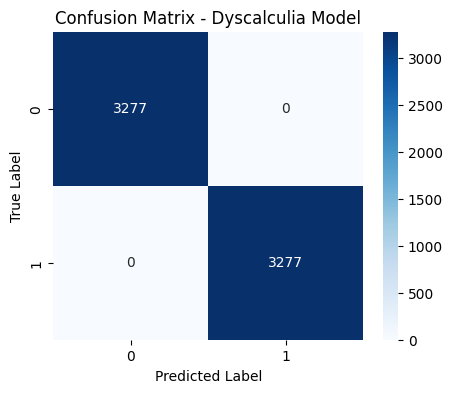

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Dyscalculia Model")
plt.show()
